![WeRateDogs](WeRateDogs.png)

# [WeRateDogs](https://twitter.com/dog_rates)
 WeRateDogs or twitter user @dog_rates is a twitter account that rates and provides humorous comments on people's dogs. It was created on the 15th of November 2015, and, in the time of writing, had tweeted and retweeted 17,557 times and currently have 9,374,920 followers. The following analysis is about their initial tweets of dog pictures from their start until the 1st of August 2017. 

## Table of contents
* [Data Background](##-Data-Background)
* [Setting Up](##-Setting-Up)
* [Tweets and User Engagements](##-Tweets-and-User-Engagements)
    * [Dog Rating](###-Dog-Rating)
    * [Dog Breed](###-Dog-Breed)
    * [Hour of the Day](###-Hour-of-the-Day)
* [Summary and Recommendation](##-Summary-and-Recommendation)

## Data Background

The dataset that is used in this analysis is a cleaned file that is part of the Udacity Data Processing course for Masterschool. It comes from three sources. A WeRateDogs Twitter archive data, a neural network image prediction data and tweet details from the twitter API. In addition to this the dog breeds are classified into groups based on the grouping of the UK Kennel Club.
The following are the columns in the datasets are the following:
1. `created_at` a datetime data on when the tweet was posted
2. `retweet_count` number of retweets the dog_rate tweet recieved
3. `favorite_count` number of times the dog_rate tweet was favorited
4. `rating_numerator` the numerator in the dog_rates' tweet
5. 'rating_denominator` the denominator in the dog_rates' tweet
6. `dog_breed` the predicted breed of the dog in the tweet's image

## Setting Up

Import the necessary python packages and read the necessary data

Python packages used where:
* `pandas`
* `numpy`
* `matplotlib`
* `seaborn`

In [1]:
# importing the necessary packages.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# get the data
analysis = pd.read_csv('analysis.csv')
#Transform the created_at column to date_time
analysis['created_at'] = pd.to_datetime(analysis['created_at'])

## Tweets and User Engagements

The following shows how the number of tweets and user engagements in the form of retweets and favorited changed through time.

/home/biogear13/miniconda3/envs/minimal_ds/lib/python3.10/site-packages/pandas/core/arrays/datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


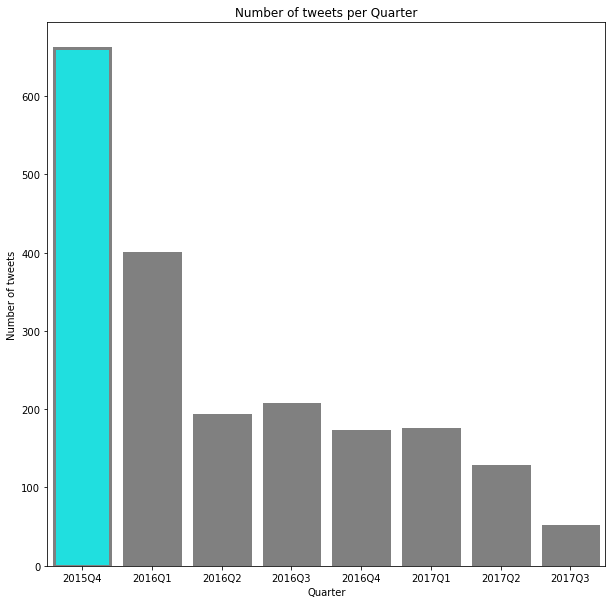

In [3]:
# Quarterly tweets and twitter interaction
quarterly_tweets = analysis.groupby(pd.Grouper(key='created_at', axis=0, freq='QS', sort=True))\
    .apply(lambda x: pd.Series({
        'num_of_tweet' : x['retweet_count'].count(),
        'total_retweet' : x['retweet_count'].sum(),
        'total_favorited': x['favorite_count'].sum(),
        'average_retweet' : x['retweet_count'].mean(),
        'average_favorited' : x['favorite_count'].mean()
    })).reset_index()
# Create a quarter column
quarterly_tweets['quarter']=quarterly_tweets['created_at'].apply(lambda x: x.to_period("Q"))
# Plot the quarterly number of tweets
tweets_color = ['grey' if (x<max(quarterly_tweets['num_of_tweet'])) else 'cyan' for x in quarterly_tweets['num_of_tweet']]
plt.figure(figsize=(10, 10))
sns.barplot(data=quarterly_tweets, x='quarter', y='num_of_tweet', linewidth=3, edgecolor="0.5", palette=tweets_color)
plt.xlabel('Quarter')
plt.ylabel('Number of tweets')
plt.title('Number of tweets per Quarter')
plt.show()


Looking at the number of tweets that the WeRateDogs posted, the frequency of tweets peaked in the first quarter of the accounts creation, with a sharp decline from the first and second quarter of 2016 and stabilization of the amount of tweets after. It is important to note that the decrease seen in the third quarter of 2017 could be explained by the fact that the data set is only up to the 1st of August.

[Text(0, 0.5, '')]

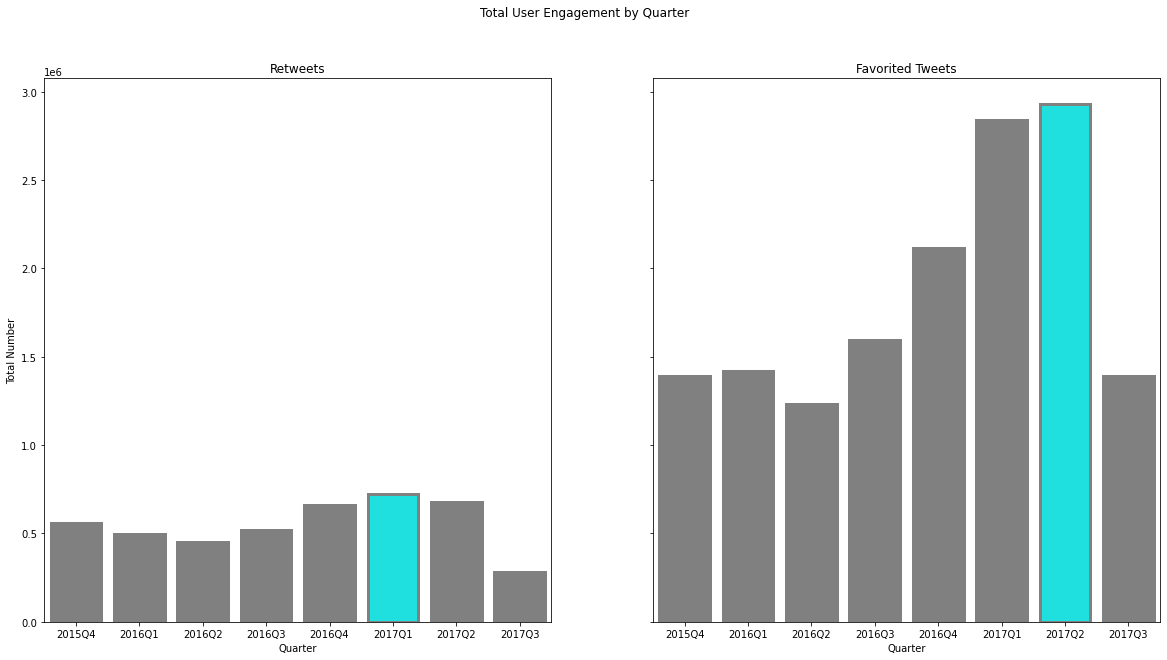

In [4]:
# Plot the different stats by quarter
fig, axes = plt.subplots(1, 2, figsize=(20,10), sharey=True)
fig.suptitle('Total User Engagement by Quarter')

# By total retweets
retweets_color = ['grey' if (x<max(quarterly_tweets['total_retweet'])) else 'cyan' for x in quarterly_tweets['total_retweet']]
sns.barplot(ax=axes[0], data=quarterly_tweets, x='quarter', y='total_retweet', linewidth=3, edgecolor="0.5", palette=retweets_color)
axes[0].set(title='Retweets')
axes[0].set(xlabel='Quarter')
axes[0].set(ylabel='Total Number')

# By total favorited
favorited_color = ['grey' if (x<max(quarterly_tweets['total_favorited'])) else 'cyan' for x in quarterly_tweets['total_favorited']]
sns.barplot(ax=axes[1], data=quarterly_tweets, x='quarter', y='total_favorited', linewidth=3, edgecolor="0.5", palette=favorited_color)
axes[1].set(title='Favorited Tweets')
axes[1].set(xlabel='Quarter')
axes[1].set(ylabel=None)

Even though tweet posts had decreased total user engagement had increased through time for both retweets and favorited tweets. The highest total retweets were seen in the first quarter of 2017 while for favorited tweets it is in the second quarter of the same year.

[Text(0, 0.5, '')]

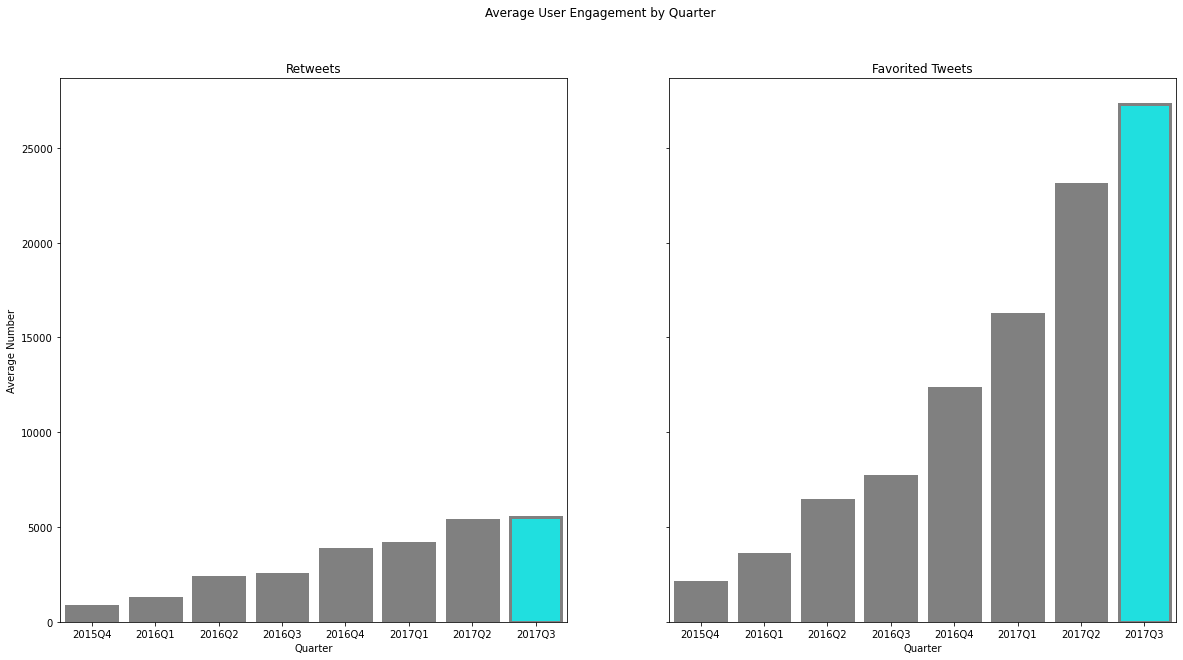

In [5]:
# Plot the different stats by quarter
fig, axes = plt.subplots(1, 2, figsize=(20,10), sharey=True)
fig.suptitle('Average User Engagement by Quarter')

# By total retweets
retweets_color = ['grey' if (x<max(quarterly_tweets['average_retweet'])) else 'cyan' for x in quarterly_tweets['average_retweet']]
sns.barplot(ax=axes[0], data=quarterly_tweets, x='quarter', y='average_retweet', linewidth=3, edgecolor="0.5", palette=retweets_color)
axes[0].set(title='Retweets')
axes[0].set(xlabel='Quarter')
axes[0].set(ylabel='Average Number')

# By total favorited
favorited_color = ['grey' if (x<max(quarterly_tweets['average_favorited'])) else 'cyan' for x in quarterly_tweets['average_favorited']]
sns.barplot(ax=axes[1], data=quarterly_tweets, x='quarter', y='average_favorited', linewidth=3, edgecolor="0.5", palette=favorited_color)
axes[1].set(title='Favorited Tweets')
axes[1].set(xlabel='Quarter')
axes[1].set(ylabel=None)

With regards to the average retweets and favorited, there is a steady increase in both parameters through time.

In summary, though the number of tweets posted by the WeRateDogs were decreasing, user engagement is increasing. The following will look at possible factors.

### Dog Rating

Since rating other people's dog has been the main selling point of the WeRateDogs twitter account, this section will look at the relationship between dog rating and user engagement. To get the dog rating, the `rating_numerator` was divided to the `rating_denominator`. This section will look if there is a correlation between dog rating and user engagement and how WeRateDogs change their ratings through time.

[Text(0, 0.5, 'Favorited Count')]

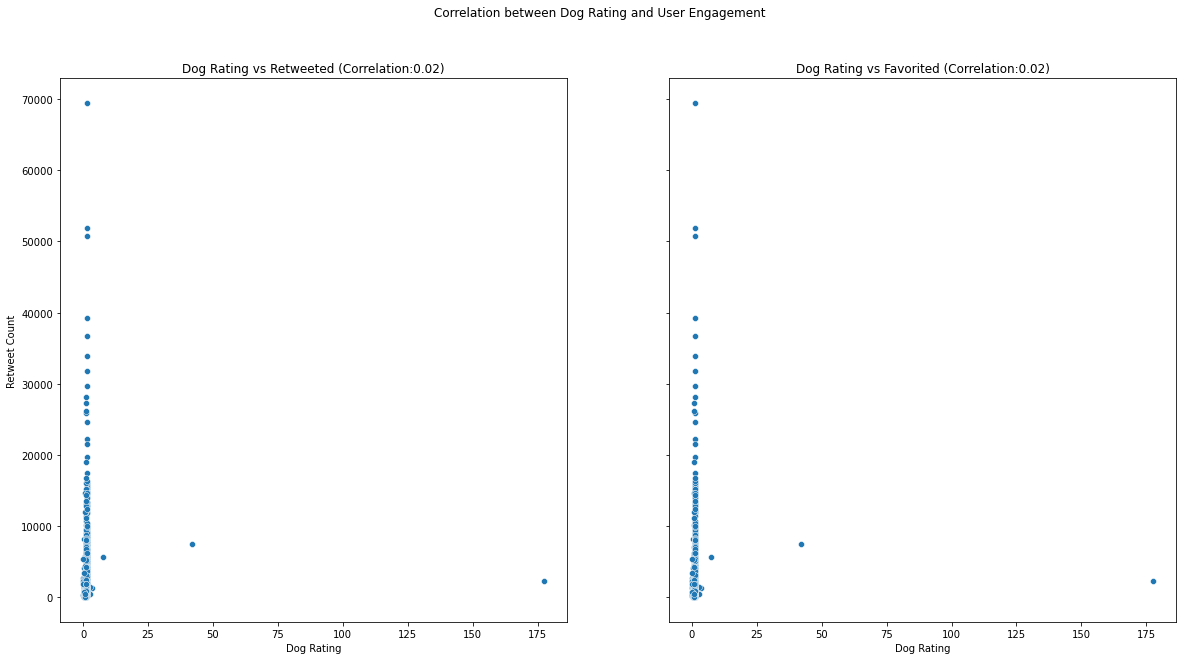

In [6]:
#Since rating_denominator is not the same for all we will compute for the rate
analysis['dog_rate']=round(analysis['rating_numerator']/analysis['rating_denominator'],2)
# Compute for the correlation
corr_rt = analysis['dog_rate'].corr(analysis['retweet_count'])
corr_ft = analysis['dog_rate'].corr(analysis['favorite_count'])
# Plot the different stats by quarter
fig, axes = plt.subplots(1, 2, figsize=(20,10), sharey=True)
fig.suptitle('Correlation between Dog Rating and User Engagement')

# By total retweets
sns.scatterplot(ax=axes[0], data=analysis, x='dog_rate', y='retweet_count')
axes[0].set(title=f'Dog Rating vs Retweeted (Correlation:{round(corr_rt,2)})')
axes[0].set(xlabel='Dog Rating')
axes[0].set(ylabel='Retweet Count')

# By total favorited
sns.scatterplot(ax=axes[1], data=analysis, x='dog_rate', y='retweet_count')
axes[1].set(title=f'Dog Rating vs Favorited (Correlation:{round(corr_ft,2)})')
axes[1].set(xlabel='Dog Rating')
axes[1].set(ylabel='Favorited Count')

As can be seen by the two histograms there seemed to be no relationship between dog rating and user engagement but a huge factor to this might be some outliers to the data set.

[Text(0, 0.5, 'Favorited Count')]

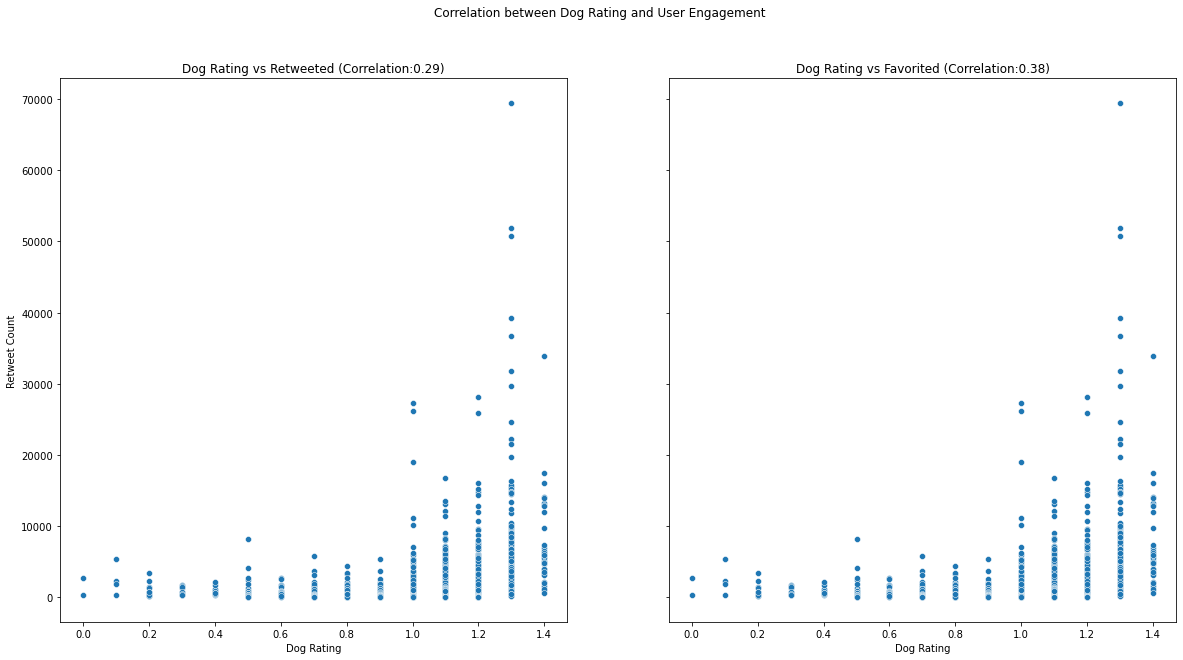

In [7]:
# Removing the outliers to the data set
outlier = analysis.groupby('dog_rate')\
    .apply(lambda x: pd.Series({
        'num_of_tweet' : x['dog_rate'].count(),
        'median_retweet' : x['retweet_count'].median()
    })).sort_values(by='num_of_tweet').reset_index()
outlier = outlier[outlier['num_of_tweet']==1]['dog_rate']
less_outlier=analysis[~analysis['dog_rate'].isin(outlier)]
# Compute for the correlation
corr_rt = less_outlier['dog_rate'].corr(less_outlier['retweet_count'])
corr_ft = less_outlier['dog_rate'].corr(less_outlier['favorite_count'])
# Plot the different stats by quarter
fig, axes = plt.subplots(1, 2, figsize=(20,10), sharey=True)
fig.suptitle('Correlation between Dog Rating and User Engagement')

# By total retweets
sns.scatterplot(ax=axes[0], data=less_outlier, x='dog_rate', y='retweet_count')
axes[0].set(title=f'Dog Rating vs Retweeted (Correlation:{round(corr_rt,2)})')
axes[0].set(xlabel='Dog Rating')
axes[0].set(ylabel='Retweet Count')

# By total favorited
sns.scatterplot(ax=axes[1], data=less_outlier, x='dog_rate', y='retweet_count')
axes[1].set(title=f'Dog Rating vs Favorited (Correlation:{round(corr_ft,2)})')
axes[1].set(xlabel='Dog Rating')
axes[1].set(ylabel='Favorited Count')

After removing the outliers there seemed to be a positive correlation between dog rating and number times the tweet is retweeted and favorited. The relationship is observed to be stronger for favorited (0.38) compered to the retweets. (0.29)

/home/biogear13/miniconda3/envs/minimal_ds/lib/python3.10/site-packages/pandas/core/arrays/datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


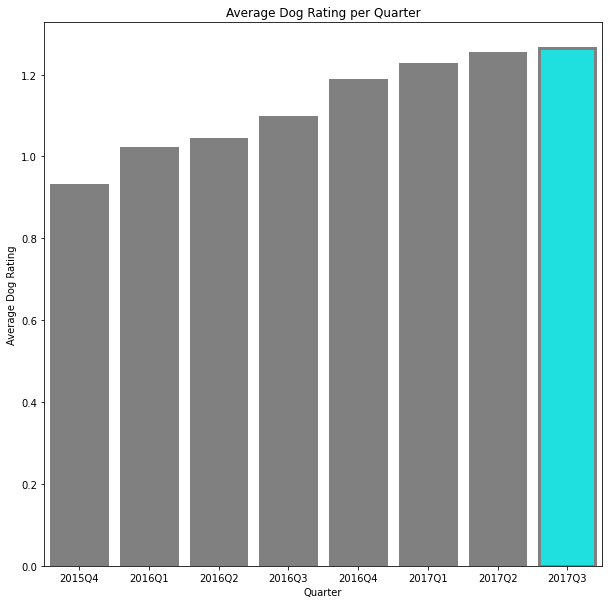

In [8]:
# Average dog rating by quarter
quarterly_dog_rates = less_outlier.groupby(pd.Grouper(key='created_at', axis=0, freq='QS', sort=True))\
    .apply(lambda x: pd.Series({
        'average_dog_rate' : x['dog_rate'].mean(),
    })).reset_index()
# Create a quarter column
quarterly_dog_rates['quarter']=quarterly_dog_rates['created_at'].apply(lambda x: x.to_period("Q"))
# Plot the quarterly number of tweets
tweets_color = ['grey' if (x<max(quarterly_dog_rates['average_dog_rate'])) else 'cyan' for x in quarterly_dog_rates['average_dog_rate']]
plt.figure(figsize=(10, 10))
sns.barplot(data=quarterly_dog_rates, x='quarter', y='average_dog_rate', linewidth=3, edgecolor="0.5", palette=tweets_color)
plt.xlabel('Quarter')
plt.ylabel('Average Dog Rating')
plt.title('Average Dog Rating per Quarter')
plt.show()

Looking at the average dog rating through time, the twitter account seems to be rating the dogs that they showcase progressively higher on the average.

### Dog Breed

This section looks into the most tweeted dog breeds, the breeds popularity to the users and if there were changes in the proportion of posts for the most and least popular dog breeds through time.

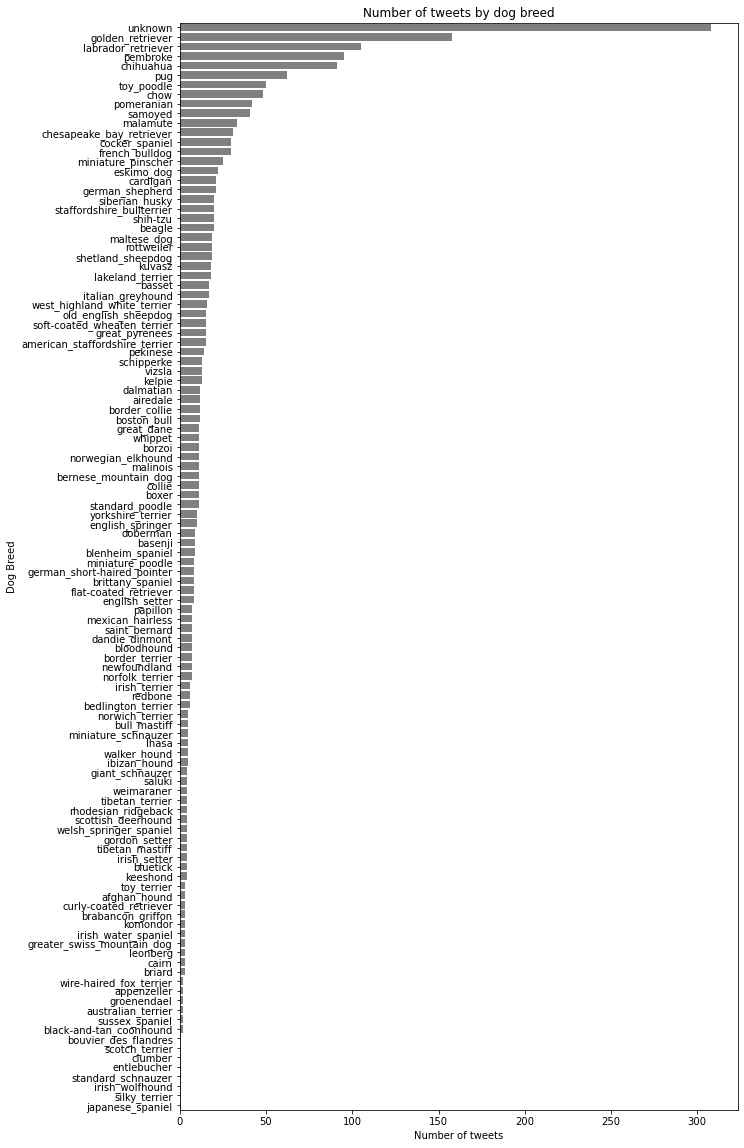

In [9]:
dog_breed=analysis.groupby(['dog_breed']).apply(lambda x: pd.Series({
    'num_of_tweet' : x['dog_breed'].count(),
    'average_retweet' : x['retweet_count'].mean(),
    'average_favorited' : x['favorite_count'].mean()})).sort_values(by='num_of_tweet',ascending=False).reset_index()
# Plot number of times a tweet was poster per dog breed
plt.figure(figsize=(10, 20))
sns.barplot(data=dog_breed, x='num_of_tweet', y='dog_breed', color='grey')
plt.ylabel('Dog Breed')
plt.xlabel('Number of tweets')
plt.title('Number of tweets by dog breed')
plt.show()

As can be seen in this graph, even though the dog breeds of a sizable chunk of the dog images were not able to be classified, WeRateDogs had featured many breeds of dogs since they started posting. With this, the following will focus on the 10 highest tweeted dog breeds.

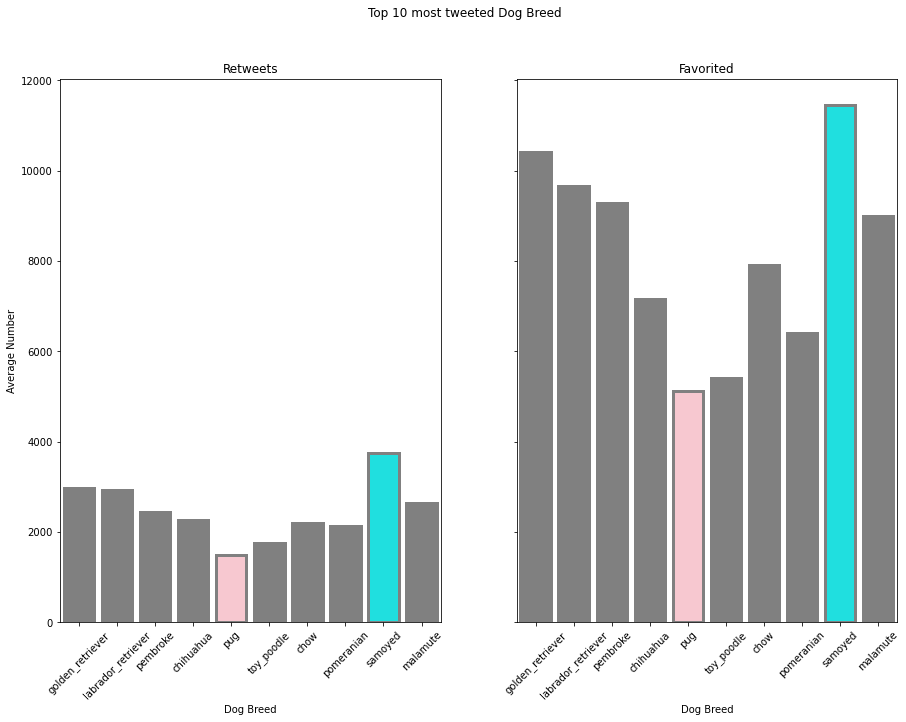

In [10]:
# Removing the unknown and those dog_breeds that tweeted only once
dog_breed_less_unknown = dog_breed[(dog_breed['dog_breed']!='unknown')]
# Get the top 10 most twweted dog_breed
dog_breed_most_tweeted = dog_breed_less_unknown.head(10)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(15,10), sharey=True)
fig.suptitle('Top 10 most tweeted Dog Breed')

# By number of tweets
tweets_color = ['cyan' if (x==max(dog_breed_most_tweeted['average_retweet'])) else ('pink' if (x==min(dog_breed_most_tweeted['average_retweet'])) else 'grey') for x in dog_breed_most_tweeted['average_retweet']]
sns.barplot(ax=axes[0], data=dog_breed_most_tweeted, x='dog_breed', y='average_retweet', linewidth=3, edgecolor="0.5", palette=tweets_color)
axes[0].set(title='Retweets')
axes[0].set(xlabel='Dog Breed')
axes[0].set(ylabel='Average Number')
axes[0].tick_params(axis='x', labelrotation=45)


# By average retweets
retweets_color = ['cyan' if (x==max(dog_breed_most_tweeted['average_favorited'])) else ('pink' if (x==min(dog_breed_most_tweeted['average_favorited'])) else 'grey') for x in dog_breed_most_tweeted['average_favorited']]
sns.barplot(ax=axes[1], data=dog_breed_most_tweeted, x='dog_breed', y='average_favorited', linewidth=3, edgecolor="0.5", palette=retweets_color)
axes[1].set(title='Favorited')
axes[1].set(xlabel='Dog Breed')
axes[1].set(ylabel=None)
axes[1].tick_params(labelrotation=45)

Of the top 10 most tweeted dog breeds, samoyed is the breed that is most popular as evidenced by the average number of retweets and favorited. On the flip side, pugs are the least favored on the average. The next graph looks into the proportion of posts dedicated to the most and least popular dogs through time.

/home/biogear13/miniconda3/envs/minimal_ds/lib/python3.10/site-packages/pandas/core/arrays/datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
/home/biogear13/miniconda3/envs/minimal_ds/lib/python3.10/site-packages/pandas/core/arrays/datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


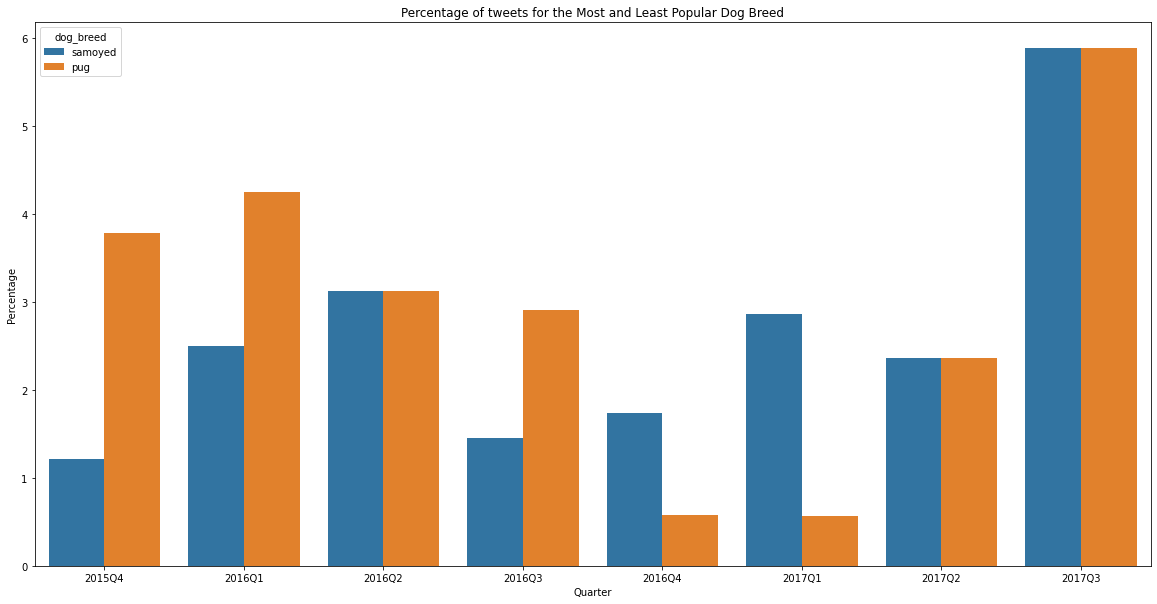

In [11]:
# From the quarterly tweets before, get the num_of_tweet
tot_num_of_tweet = quarterly_tweets[['quarter', 'num_of_tweet']]
# Create a dataframe for the samoyed entries
samoyed_df = analysis[analysis['dog_breed']=='samoyed']
# Samoyed posts by quarter
quarterly_samoyed = samoyed_df.groupby(pd.Grouper(key='created_at', axis=0, freq='QS', sort=True))\
    .apply(lambda x: pd.Series({
        'tweet_num' : x['dog_rate'].count()
    })).reset_index()
quarterly_samoyed['dog_breed']='samoyed'
# Create a quarter column
quarterly_samoyed['quarter']=quarterly_samoyed['created_at'].apply(lambda x: x.to_period("Q"))
# merge with tot_num_of_tweet
quarterly_samoyed = quarterly_samoyed.merge(tot_num_of_tweet, on='quarter')
# compute for the percentage
quarterly_samoyed['percent'] = round(quarterly_samoyed['tweet_num']/quarterly_samoyed['num_of_tweet']*100,2)
# Create a dataframe for the pug entries
pug_df = analysis[analysis['dog_breed']=='pug']
# Pug posts by quarter
quarterly_pug = pug_df.groupby(pd.Grouper(key='created_at', axis=0, freq='QS', sort=True))\
    .apply(lambda x: pd.Series({
        'tweet_num' : x['dog_rate'].count()
    })).reset_index()
quarterly_pug['dog_breed']='pug'
# Create a quarter column
quarterly_pug['quarter']=quarterly_pug['created_at'].apply(lambda x: x.to_period("Q"))
# merge with tot_num_of_tweet
quarterly_pug = quarterly_pug.merge(tot_num_of_tweet, on='quarter')
# compute for the percentage
quarterly_pug['percent'] = round(quarterly_pug['tweet_num']/quarterly_pug['num_of_tweet']*100,2)
# Join the two table
dog_breed_quarter = pd.concat([quarterly_samoyed, quarterly_pug], ignore_index=True)
# Plot percentage of samoyed and pug through time
plt.figure(figsize=(20, 10))
sns.barplot(data=dog_breed_quarter, x='quarter', y='percent', hue='dog_breed')
plt.ylabel('Percentage')
plt.xlabel('Quarter')
plt.title('Percentage of tweets for the Most and Least Popular Dog Breed')
plt.show()

Posts for pugs, which have lesser user engagement among the top 10 most tweeted dog breed, have a higher percentage compared to posts for samoyed during the earlier quarters specifically the fourth quarter of 2015 and the first and third quarter of 2016. Conversely samoyed have higher percentage in the last quarter of 2016 and the first quarter of 2017. In the two most recent quarters, the number of tweets of pugs and samoyed are the same.  WeRateDogs might be prioritising posting more popular dog breeds as evidence of increasing percentage for samoyed but more study is needed to confirm this.

## Hour of the Day

This section will look into what hour of the day do WeRateDogs posts and what hour of the day do posts have the most engagement.

Text(0, 0.5, 'Number of Tweet')

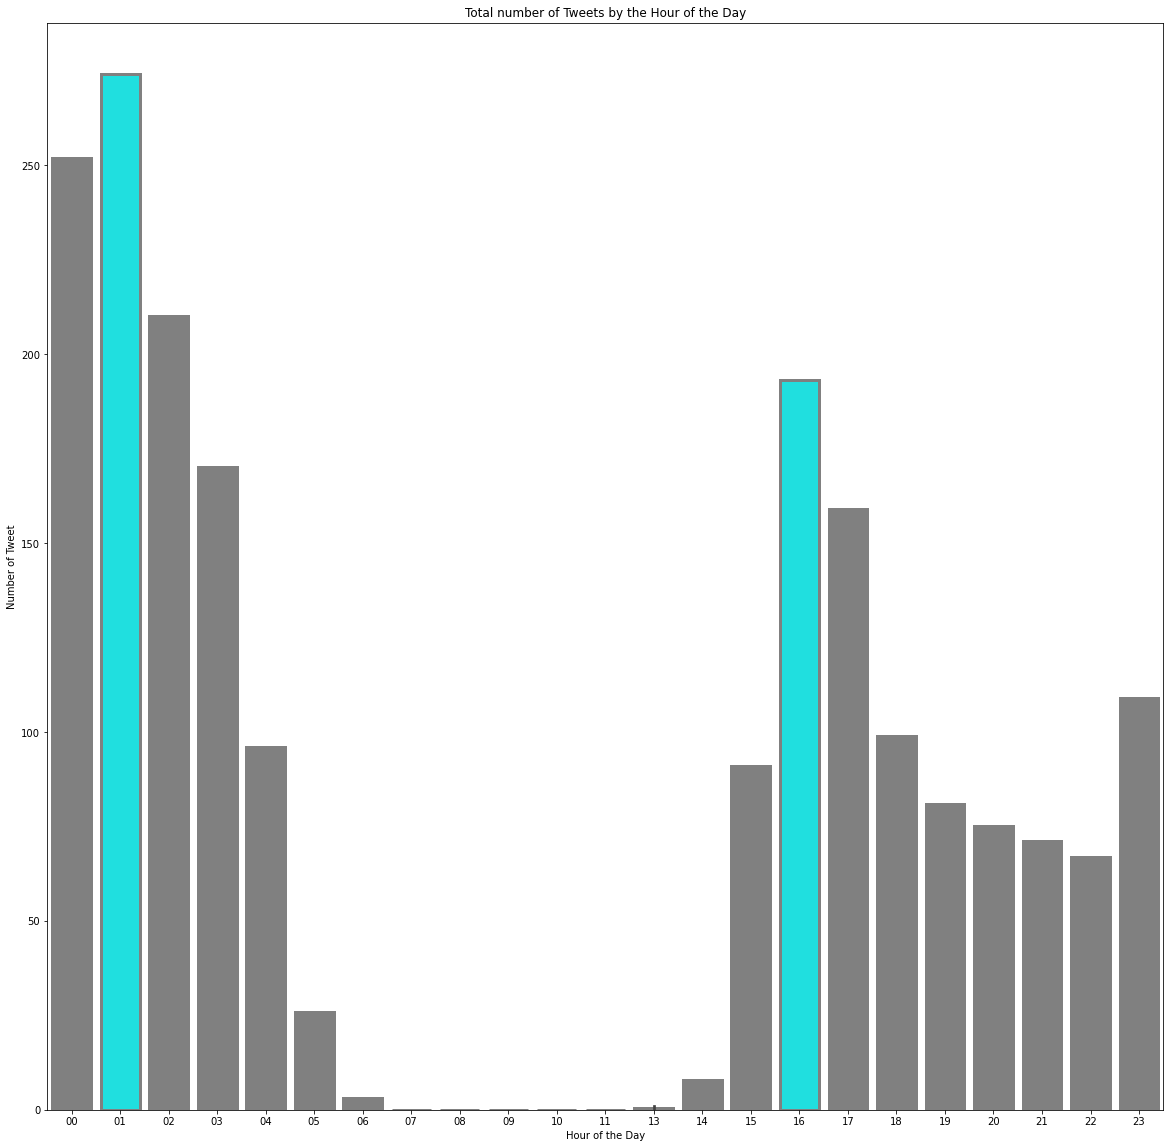

In [12]:
# Create the hour of day based on the created_at column
analysis['hour_of_day'] = analysis['created_at'].apply(lambda x: x.strftime('%H'))
hour=analysis.groupby(['hour_of_day']).apply(lambda x: pd.Series({
    'num_of_tweet' : x['hour_of_day'].count(),
    'median_retweet': x['retweet_count'].median(),
    'median_favorite':x['favorite_count'].median()
})).reset_index()
# Since there are missing hours we coul add them
dict_missing_hours = {'hour_of_day': ['07', '08', '09', '10', '11', '13'],
                     'num_of_tweet': [0, 0, 0, 0, 0, 0]}
missing_hours = pd.DataFrame(dict_missing_hours)
hour = hour.append(missing_hours, ignore_index =True)
hour = hour.sort_values(by='hour_of_day')
#Graph the number of tweets by the hour
plt.figure(figsize=(20, 20))
tweets_color = ['cyan' if (x in ['01', '15']) else 'grey' for x in hour['hour_of_day']]
sns.barplot(data=hour, x='hour_of_day', y='num_of_tweet', linewidth=3, edgecolor="0.5", palette=tweets_color)
plt.title('Total number of Tweets by the Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Tweet')

In terms of tweet posting, there seems to be two peaks. The first peak is at 0100 and this has the highest number of tweets and the second peak is at 1600. Next graph looks into the hour of the day that sees the highest user engagement.

[Text(0, 0.5, 'Median Number')]

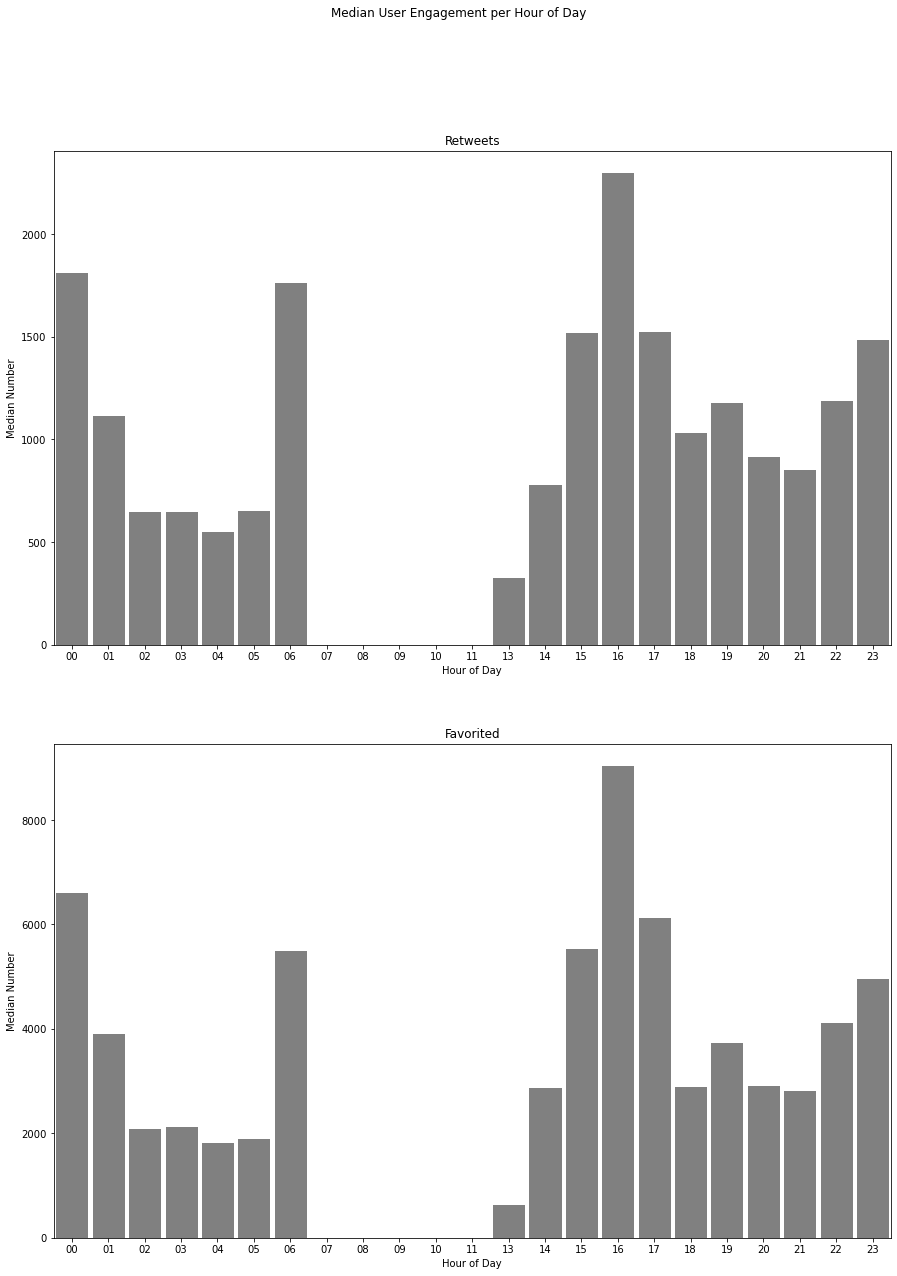

In [13]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(15,20))
fig.suptitle('Median User Engagement per Hour of Day')

# By number of tweets
#tweets_color = ['grey' if (x<max(hour['median_retweet'])) else 'cyan' for x in hour['median_retweet']]
sns.barplot(ax=axes[0], data=hour, x='hour_of_day', y='median_retweet', linewidth=3, edgecolor="0.5", color='grey')
axes[0].set(title='Retweets')
axes[0].set(xlabel='Hour of Day')
axes[0].set(ylabel='Median Number')

# By average retweets
#retweets_color = ['grey' if (x<max(hour['median_favorite'])) else 'cyan' for x in hour['median_favorite']]
sns.barplot(ax=axes[1], data=hour, x='hour_of_day', y='median_favorite', linewidth=3, edgecolor="0.5", color='grey')
axes[1].set(title='Favorited')
axes[1].set(xlabel='Hour of Day')
axes[1].set(ylabel='Median Number')

In the above table, for both retweets and favorited, the posts that have the highest median retweets and favorited are those that was posted at 1600 hours. The next graph will look into the rate of 1600 posts through time.

/home/biogear13/miniconda3/envs/minimal_ds/lib/python3.10/site-packages/pandas/core/arrays/datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


Text(0, 0.5, 'Percentage')

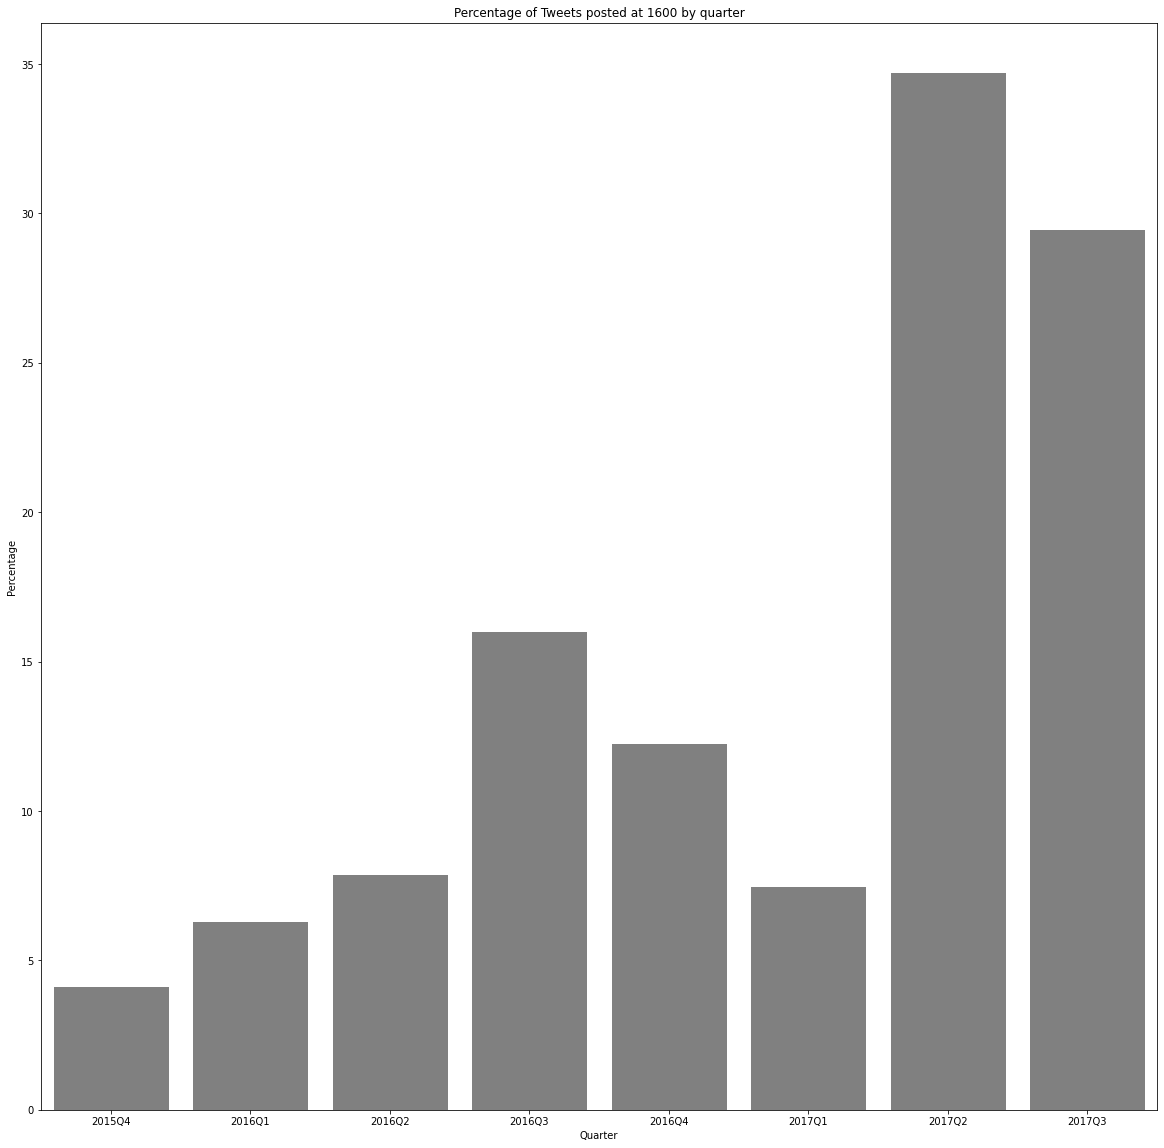

In [14]:
# Create a dataframe for the 1600
hour16_df = analysis[analysis['hour_of_day']=='16']
# Average dog rating by quarter
hour16_df = hour16_df.groupby(pd.Grouper(key='created_at', axis=0, freq='QS', sort=True))\
    .apply(lambda x: pd.Series({
        'tweet_num' : x['hour_of_day'].count()
    })).reset_index()
# Create a quarter column
hour16_df['quarter']=hour16_df['created_at'].apply(lambda x: x.to_period("Q"))
# merge with tot_num_of_tweet
hour16_df = hour16_df.merge(tot_num_of_tweet, on='quarter')
# compute for the percentage
hour16_df['percent'] = round(hour16_df['tweet_num']/hour16_df['num_of_tweet']*100,2)
# Percentage of posts at 1600
plt.figure(figsize=(20, 20))
#tweets_color = ['cyan' if (x in ['01', '15']) else 'grey' for x in hour['hour_of_day']]
sns.barplot(data=hour16_df, x='quarter', y='percent', linewidth=3, edgecolor="0.5", color='grey')
plt.title('Percentage of Tweets posted at 1600 by quarter')
plt.xlabel('Quarter')
plt.ylabel('Percentage')

In general the percentage of tweets sent at 1600 were increasing through time. 

## Summary and Recommendation

WeRateDogs from the 4th quarter of 2015 and 3rd quarter had enjoyed increasing user engagement both in terms of retweets and favorited despite of decreasing number of twitter posts. In terms of dog rating, there is a positive correlation between user engagement and the rate of dogs and we see that WeRateDogs had also increased their average dog rates through time. As for dog breeds, it was seen that of the top 10 most tweeted dog breeds, the samoyed had the most user engagement while the pug have the least. It was also seen that percentage of posts regarding samoyed breeds increased from first to the last quarter. With regards to the hour of day in which WeRateDogs posts their tweets, it peaks at 0100 and 1600. Most user engagement were seen in the posts at 1600 and the account had generally their rate of posts during that time. These three factors that were looked into might have relation to user engagement but more study is recommended. Specifically, the number of followers could be looked into as well as studying the dog group not just the dog breed since there might be inaccuracies in identifying the specific dog breed.

[Back to Table Contents](##-Table-of-contents)